### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
import gzip  # Trabalha com arquivos comprimidos no formato .gz (gzip)
import pandas as pd  # Manipulação de dados em formato de tabela (DataFrame)
import numpy as np  # Operações matemáticas e estruturas de arrays eficientes
import matplotlib.pyplot as plt  # Criação de gráficos básicos e visualizações
import seaborn as sns  # Gráficos estatísticos com estilo mais bonito (baseado no matplotlib)
from sklearn.metrics import (
    roc_auc_score,        # Métrica AUC para avaliação de classificadores
    confusion_matrix,     # Matriz de confusão para avaliação de modelos
    make_scorer,          # Criação de métricas personalizadas
    f1_score              # Métrica F1 que combina precisão e recall
)
from sklearn.linear_model import LogisticRegression  # Algoritmo de regressão logística (classificação binária)
from sklearn.compose import make_column_selector as selector  # Seleciona colunas com base em tipo ou nomes
from sklearn.impute import SimpleImputer  # Preenchimento de valores ausentes (missing data)
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Padronização de dados e codificação categórica
from sklearn.compose import ColumnTransformer  # Aplica transformações diferentes em colunas distintas
from sklearn.pipeline import Pipeline  # Cria sequência ordenada de etapas (pipeline de modelagem)
from sklearn.datasets import fetch_openml  # Baixa datasets públicos do OpenML direto pro seu notebook
from sklearn.model_selection import train_test_split  # Divide os dados entre treino e teste

#Settings for plots
plt.rcParams['figure.figsize'] = [10, 7]  # Define o tamanho padrão dos gráficos como 10x7 polegadas
plt.rcParams['font.size'] = 15            # Define o tamanho padrão da fonte nos gráficos matplotlib
sns.set(color_codes=True)                 # Ativa uso de códigos de cor (ex: 'b' para azul) no Seaborn
sns.set(font_scale=1.5)                   # Aumenta a escala do tamanho da fonte nos gráficos do Seaborn
sns.set_palette("bright")                 # Define paleta de cores vibrantes para os gráficos do Seaborn
sns.set_style("whitegrid")                # Aplica estilo com fundo branco e linhas de grade (ideal pra visualização)

In [3]:
from tqdm import tqdm # Barra de progresso para loops (tqdm é uma biblioteca que facilita a visualização do progresso de loops longos)



In [4]:


dataset = fetch_openml(name = 'adult', as_frame =True)
df, y = dataset.data, dataset.target

c:\Users\JORGE BRX\miniconda3\envs\automlx-env\Lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name adult exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Users\JORGE BRX\miniconda3\envs\automlx-env\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
4,1,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba


In [6]:

class_type = y.unique();
print(f"\nClass type: {class_type[0]} - {class_type[1]}")

df[y.name] = y.astype('category').cat.codes  # Converte a variável alvo para o tipo categórico

r = len(df)

print(f"DataSet has {r} rows and {df.shape[1]} columns")

for r in y.unique():
    print(f"\nClass {r} has {len(df[df[y.name] == r])} rows")




Class type: <=50K - >50K
DataSet has 48842 rows and 15 columns

Class <=50K has 0 rows

Class >50K has 0 rows


In [7]:
pd.DataFrame({'Data types': df.dtypes}).T

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
Data types,category,category,float64,category,float64,category,category,category,category,category,category,category,category,category,int8


In [8]:
pd.DataFrame({'Missing values': df.isnull().sum() * 100/ len(df)}).T

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
Missing values,0.0,5.730724,0.0,0.0,0.0,0.0,5.751198,0.0,0.0,0.0,0.0,0.0,0.0,1.754637,0.0


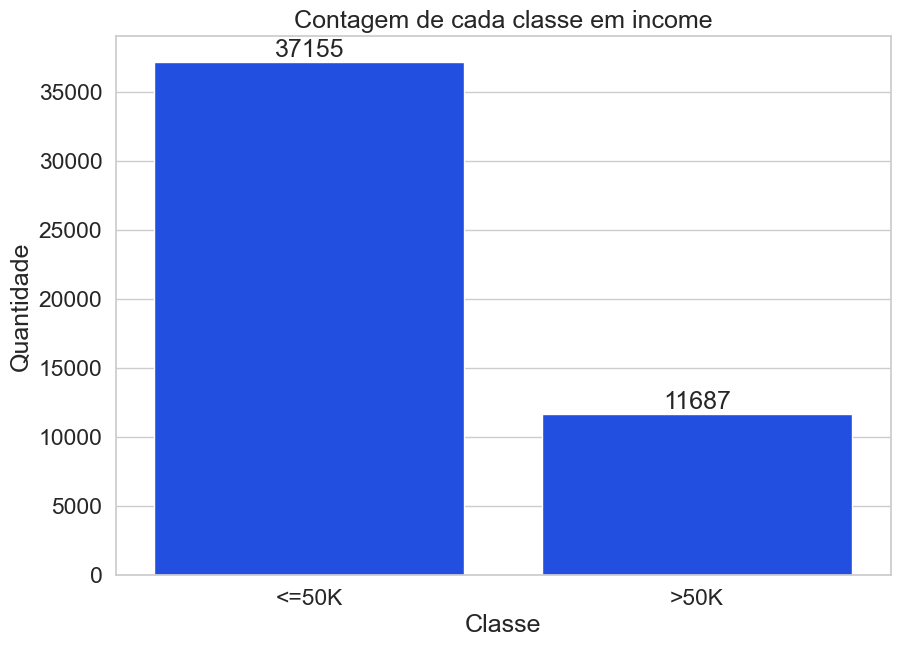

In [9]:
y_df = pd.DataFrame(y);
y_df.columns = ['income']  # Renomeia a coluna do DataFrame de y para o nome original

ax = sns.countplot(x='income', data=y_df) # Plota a contagem de cada classe na variável alvo 'income'
ax.bar_label(ax.containers[0])  # Adiciona rótulos de contagem em cima de cada barra do gráfico

plt.title('Contagem de cada classe em income')  # Define o título do gráfico
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

In [10]:
numeric_columns = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']
for col in df.columns:
    if col in numeric_columns:
        df[col] = df[col].astype('int')

# Map y to binary and convert to int
y_binary = y.map({'>50K': 1, '<=50K': 0}).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df, y_binary, train_size=0.7, random_state=42)

X_train.shape, X_test.shape  # Divide os dados em conjuntos de treino e teste, mapeando as classes para 1 e 0

((34189, 15), (14653, 15))

In [11]:
import automlx  # Importa o pacote completo 'automl', que pode conter métodos para AutoML (automatizar experimentos de machine learning)

from automlx import init  # Importa especificamente a função 'init' do pacote — geralmente usada para inicializar ou configurar o ambiente AutoML
init(engine='local') # Inicializa o ambiente AutoML localmente

In [12]:
est1 = automlx.Pipeline(task = 'classification') # Cria um pipeline de automação de machine learning para classificação
est1.fit(X_train, y_train)  # Treina o modelo com os dados de treino

[2025-08-02 23:08:06,103] [automlx.interface] Dataset shape: (34189,15)
[2025-08-02 23:08:06,523] [automlx.data_transform] Running preprocessing. Number of features: 16
[2025-08-02 23:08:07,420] [automlx.data_transform] Preprocessing completed. Took 0.898 secs
[2025-08-02 23:08:07,496] [automlx.process] Running Model Generation
[2025-08-02 23:08:07,538] [automlx] Provided model (TorchMLPClassifier) is not supported.Supported models are: ['CatBoostClassifier', 'LGBMClassifier', 'SVC', 'AdaBoostClassifier', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GaussianNB', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LinearSVC', 'LogisticRegressionClassifier', 'RandomForestClassifier', 'XGBClassifier']
[2025-08-02 23:08:07,539] [automlx.process] KNeighborsClassifier is disabled. The KNeighborsClassifier model is only recommended for datasets with less than 10000 samples and 1000 features.
[2025-08-02 23:08:07,540] [automlx.process] SVC is disabled. The SVC model is only recommende

: 